# Epoch Model Insomnia Score
Training epoch-level models to predict how long insomnia will last etc.

In [3]:
import numpy as np
import pandas as pd
import run_yasa
import logging
import mne
import yasa
import os
import argparse
import os

import mne
import numpy as np
import pandas as pd
from brainflow.board_shim import BoardShim, BoardIds
from brainflow.data_filter import DataFilter

from memory import garbage_collect

log = lambda msg: logging.info(msg)


# Load data

In [4]:
input_dir = "C:\\dev\\play\\brainwave-data"


In [5]:
import stitch_pipeline_results
from importlib import reload
reload(stitch_pipeline_results)

df_orig = stitch_pipeline_results.stitch_all_days_optimised(input_dir)
df = df_orig.copy()

  0%|          | 0/117 [00:00<?, ?it/s]

C:\dev\play\brainwave-processor\stitch_pipeline_results.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return post_stitch(pd.concat(all_dfs))
C:\dev\play\brainwave-processor\stitch_pipeline_results.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 190.5  190.   189.5 ... -425.  -425.5 -426. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[group.index, 'SSMinsUntilLongWake'] = (df.loc[first_long_wake_idx, 'Timestamp'] - df.loc[group.index, 'Timestamp']).dt.total_seconds() / 60


In [23]:
import sleep_events
from importlib import reload
reload(sleep_events)


nights = sleep_events.load_nights_data()

In [41]:
df_orig[df_orig['dayAndNightOf'] == '2024-08-17']

,Stage,Confidence,Epoch,Timestamp,Source,StageInt,Main_eeg_abspow_s,Main_eeg_abspow_c7min_norm_s,Main_eeg_abspow_p2min_norm_s,Main_eeg_alpha_s,...,SSPreReadyToSleep,SSAfterSleep,SSDuringReadyToSleep,SSAfterFinalWake,SSDuringSleep,SSWakeDuringSleep,SSDuringLongWake,SSMinsUntilLongWake,SSLongWakeThisNight,SSLongWakeThisNightAndIsBefore


In [28]:
nights[['dayAndNightOf', 'yasa.usable']]

,dayAndNightOf,yasa.usable
0,2024-04-29,NaN
1,2024-04-30,NaN
2,2024-05-01,NaN
3,2024-05-02,NaN
4,2024-05-03,NaN
...,...,...
212,2024-12-20,Yes
213,2024-12-21,Yes
214,2024-12-27,Yes
215,2024-12-28,Yes


In [7]:
import stitch_pipeline_results
from importlib import reload
reload(stitch_pipeline_results)
from stitch_pipeline_results import post_stitch

df = df_orig.copy()
df = post_stitch(df)


C:\dev\play\brainwave-processor\stitch_pipeline_results.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 190.5  190.   189.5 ... -425.  -425.5 -426. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[group.index, 'SSMinsUntilLongWake'] = (df.loc[first_long_wake_idx, 'Timestamp'] - df.loc[group.index, 'Timestamp']).dt.total_seconds() / 60


In [44]:
df = df.merge(nights, on='dayAndNightOf')

SSWakeDuringSleep
False    792
True     523
Name: count, dtype: int64

1

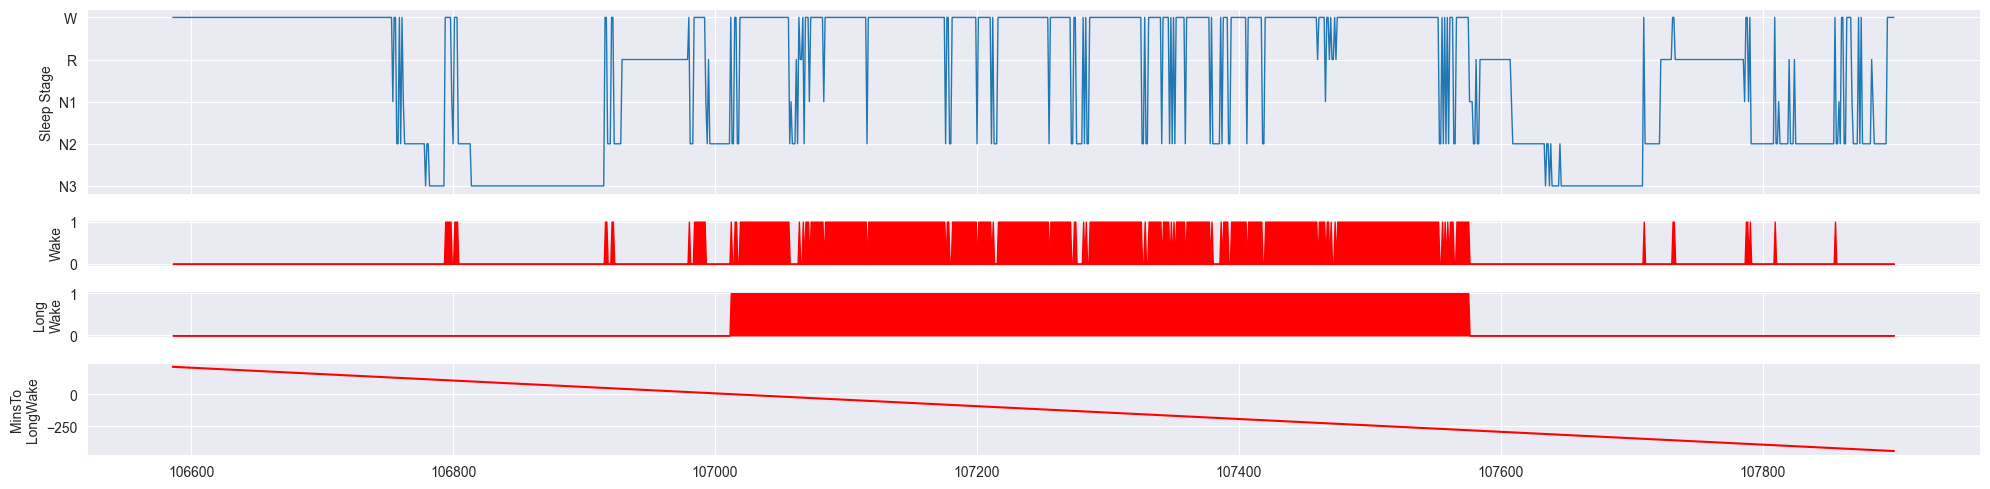

In [55]:
reload(stitch_pipeline_results)
from stitch_pipeline_results import find_long_wakes
# Plot hypnogram
import matplotlib.pyplot as plt

def draw_day(interesting_day):
    df_for_day = df[df['dayAndNightOf'] == interesting_day]

    # Map stages to numeric values for plotting
    stage_map = {'W': 4, 'R': 3, 'N1': 2, 'N2': 1, 'N3': 0}
    stage_values = df_for_day['Stage'].map(stage_map)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True, gridspec_kw={'height_ratios': [2, 0.5, 0.5, 1]})

    # Plot stages
    ax1.plot(stage_values, linewidth=1)
    ax1.set_yticks(list(stage_map.values()))
    ax1.set_yticklabels(list(stage_map.keys()))
    ax1.set_ylabel('Sleep Stage')
    ax1.grid(True)

    # Plot long wakes
    ax2.fill_between(df_for_day.index, 0, df_for_day['SSWakeDuringSleep'].astype(int), color='red')
    ax2.set_ylabel('Wake')

    ax3.fill_between(df_for_day.index, 0, df_for_day['SSDuringLongWake'].astype(int), color='red')
    ax3.set_ylabel('Long\nWake')

    ax4.plot(df_for_day['SSMinsUntilLongWake'], color='red')
    ax4.set_ylabel('MinsTo\nLongWake')


    plt.tight_layout()
    plt.show()

interesting_day = "2024-12-28"
df_for_day = df[df['dayAndNightOf'] == interesting_day]
display(df_for_day['SSWakeDuringSleep'].value_counts())
long_wakes = find_long_wakes(df_for_day)
display(len(long_wakes))

draw_day(interesting_day)

In [42]:
# missing_yasa_usable = nights[(nights['dayAndNightOf'] > '2024-07-05') & (nights['yasa.usable'].isna())]
# missing_yasa_usable['dayAndNightOf'] = missing_yasa_usable['dayAndNightOf'].dt.strftime('%Y-%m-%d')


C:\Users\graha\AppData\Local\Temp\ipykernel_15128\296224499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_yasa_usable['dayAndNightOf'] = missing_yasa_usable['dayAndNightOf'].dt.strftime('%Y-%m-%d')
C:\Users\graha\AppData\Local\Temp\ipykernel_15128\296224499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_yasa_usable['Link'] = "http://localhost:3000/input/morningReview?date=" + missing_yasa_usable["dayAndNightOf"]


In [51]:
grouped = df.groupby('dayAndNightOf').agg(
    dayAndNightOf=('dayAndNightOf', 'first'),
    YasaUsable=('yasa.usable', 'first'),
    HasLongWake=('SSLongWakeThisNight', 'any'),
    SSDuringLongWake_True=('SSDuringLongWake', lambda x: (x == True).sum()),
    SSDuringLongWake_False=('SSDuringLongWake', lambda x: (x == False).sum()),
    SSLongWakeThisNight_True=('SSLongWakeThisNight', lambda x: (x == True).sum()),
    SSLongWakeThisNight_false=('SSLongWakeThisNight', lambda x: (x == False).sum()),
    MeanMinsUntilLongWake=('SSMinsUntilLongWake', 'mean')
)
grouped['Link'] = "http://localhost:3000/input/morningReview?date=" + grouped["dayAndNightOf"].dt.strftime('%Y-%m-%d')

# grouped= grouped.merge(missing_yasa_usable, on='dayAndNightOf')
grouped

,dayAndNightOf,YasaUsable,HasLongWake,SSDuringLongWake_True,SSDuringLongWake_False,SSLongWakeThisNight_True,SSLongWakeThisNight_false,MeanMinsUntilLongWake,Link
dayAndNightOf,,,,,,,,,
2024-07-08,2024-07-08,For part of night,False,0,310,0,310,-1.0,http://localhost:3000/input/morningReview?date...
2024-07-11,2024-07-11,Yes,False,0,1056,0,1056,-1.0,http://localhost:3000/input/morningReview?date...
2024-07-12,2024-07-12,Yes,False,0,1049,0,1049,-1.0,http://localhost:3000/input/morningReview?date...
2024-07-13,2024-07-13,For part of night,False,0,892,0,892,-1.0,http://localhost:3000/input/morningReview?date...
2024-07-14,2024-07-14,None,False,0,970,0,970,-1.0,http://localhost:3000/input/morningReview?date...
...,...,...,...,...,...,...,...,...,...
2024-12-20,2024-12-20,Yes,False,0,1073,0,1073,-1.0,http://localhost:3000/input/morningReview?date...
2024-12-21,2024-12-21,Yes,False,0,1236,0,1236,-1.0,http://localhost:3000/input/morningReview?date...
2024-12-27,2024-12-27,Yes,False,0,1268,0,1268,-1.0,http://localhost:3000/input/morningReview?date...


In [58]:
missing_yasa_usable = grouped[grouped['YasaUsable'].isna()]
missing_yasa_usable

,dayAndNightOf,YasaUsable,HasLongWake,SSDuringLongWake_True,SSDuringLongWake_False,SSLongWakeThisNight_True,SSLongWakeThisNight_false,MeanMinsUntilLongWake,Link
dayAndNightOf,,,,,,,,,
2024-07-14,2024-07-14,None,False,0,970,0,970,-1.0,http://localhost:3000/input/morningReview?date...
2024-07-26,2024-07-26,None,False,0,1116,0,1116,-1.0,http://localhost:3000/input/morningReview?date...
2024-07-27,2024-07-27,None,False,0,1161,0,1161,-1.0,http://localhost:3000/input/morningReview?date...
2024-09-03,2024-09-03,None,False,0,1780,0,1780,-1.0,http://localhost:3000/input/morningReview?date...


In [60]:
for row in missing_yasa_usable['dayAndNightOf']:
    #date = row['dayAndNightOf'].date()
    print(row.date())

2024-07-14
2024-07-26
2024-07-27
2024-09-03


In [66]:
not_yes_nights = grouped[(grouped['YasaUsable'] != 'Yes')]
not_yes_nights[['dayAndNightOf', 'YasaUsable']]

,dayAndNightOf,YasaUsable
dayAndNightOf,,
2024-07-08,2024-07-08,For part of night
2024-07-13,2024-07-13,For part of night
2024-07-14,2024-07-14,None
2024-07-24,2024-07-24,For full night but not all channels
2024-07-26,2024-07-26,None
2024-07-27,2024-07-27,None
2024-08-26,2024-08-26,No
2024-09-03,2024-09-03,None
2024-09-16,2024-09-16,For part of night


In [67]:
partial_nights = grouped[(grouped['YasaUsable'] != 'Yes') & (grouped['YasaUsable'] != 'No') & (~grouped['YasaUsable'].isna())]
partial_nights[['dayAndNightOf', 'YasaUsable']]

,dayAndNightOf,YasaUsable
dayAndNightOf,,
2024-07-08,2024-07-08,For part of night
2024-07-13,2024-07-13,For part of night
2024-07-24,2024-07-24,For full night but not all channels
2024-09-16,2024-09-16,For part of night
2024-11-27,2024-11-27,For part of night
2024-12-01,2024-12-01,For part of night
2024-12-03,2024-12-03,For part of night


In [15]:
reload(stitch_pipeline_results)
from stitch_pipeline_results import find_long_wakes
# Plot hypnogram
import matplotlib.pyplot as plt

def draw_day(interesting_day):
    df_for_day = df[df['dayAndNightOf'] == interesting_day]

    # Map stages to numeric values for plotting
    stage_map = {'W': 4, 'R': 3, 'N1': 2, 'N2': 1, 'N3': 0}
    stage_values = df_for_day['Stage'].map(stage_map)

    fig, (ax1) = plt.subplots(1, 1, figsize=(20, 5), sharex=True, gridspec_kw={'height_ratios': [2, 0.5, 0.5, 1]})

    # Plot stages
    ax1.plot(stage_values, linewidth=1)
    ax1.set_yticks(list(stage_map.values()))
    ax1.set_yticklabels(list(stage_map.keys()))
    ax1.set_ylabel('Sleep Stage')
    ax1.grid(True)


    plt.tight_layout()
    plt.show()


2024-07-08 00:00:00
NaT


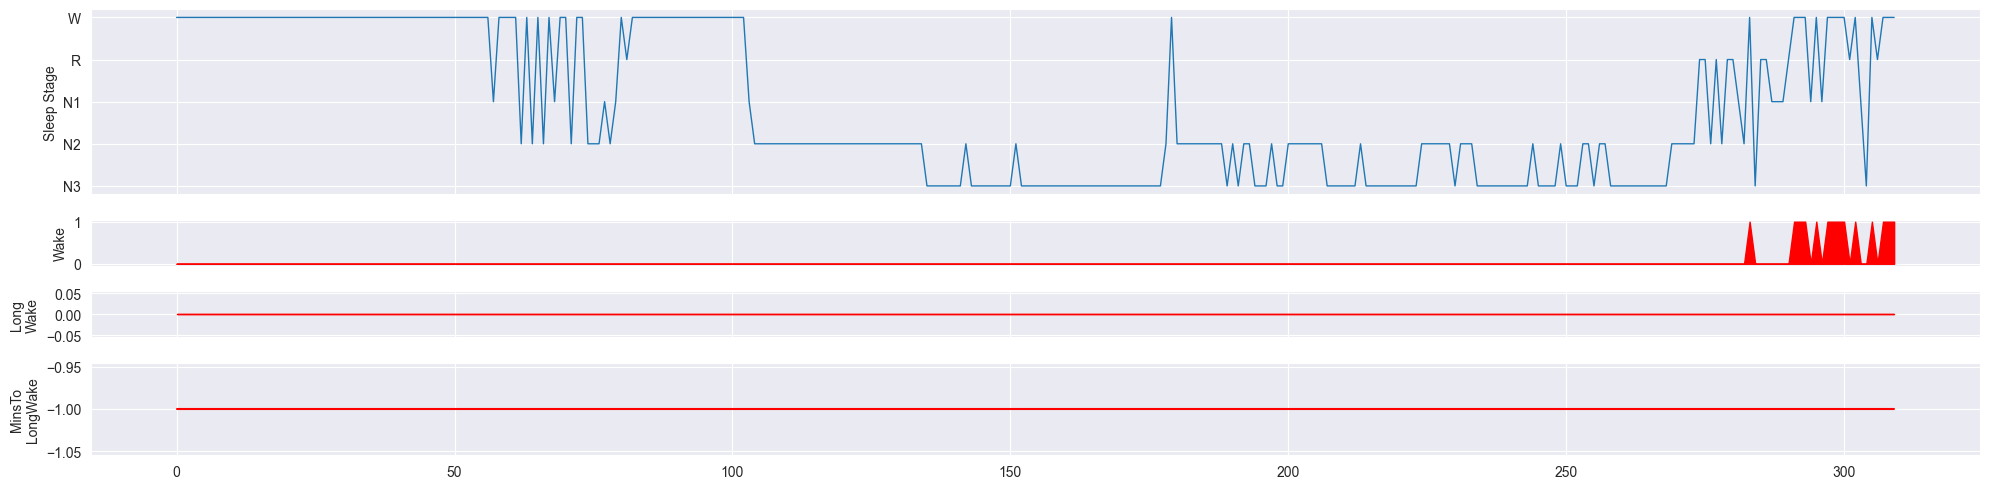

2024-07-11 00:00:00
NaT


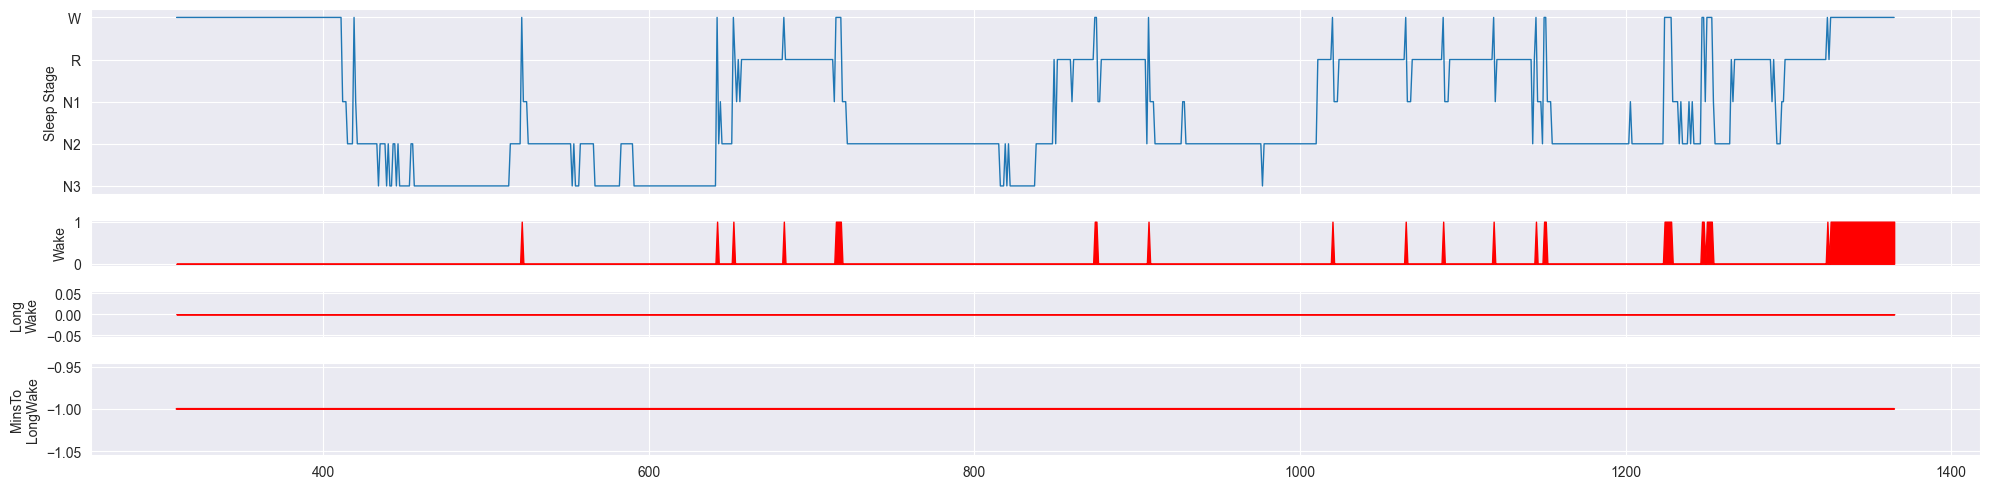

2024-07-12 00:00:00
NaT


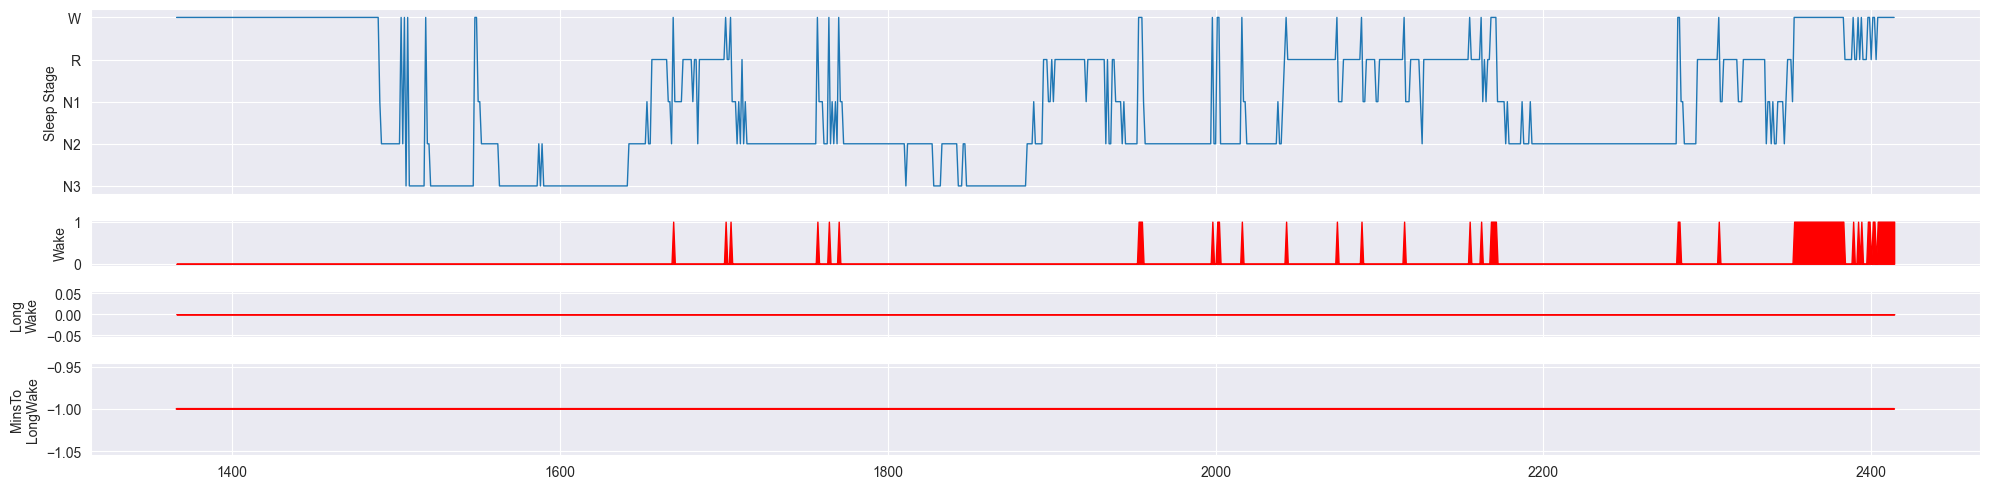

2024-07-13 00:00:00
NaT


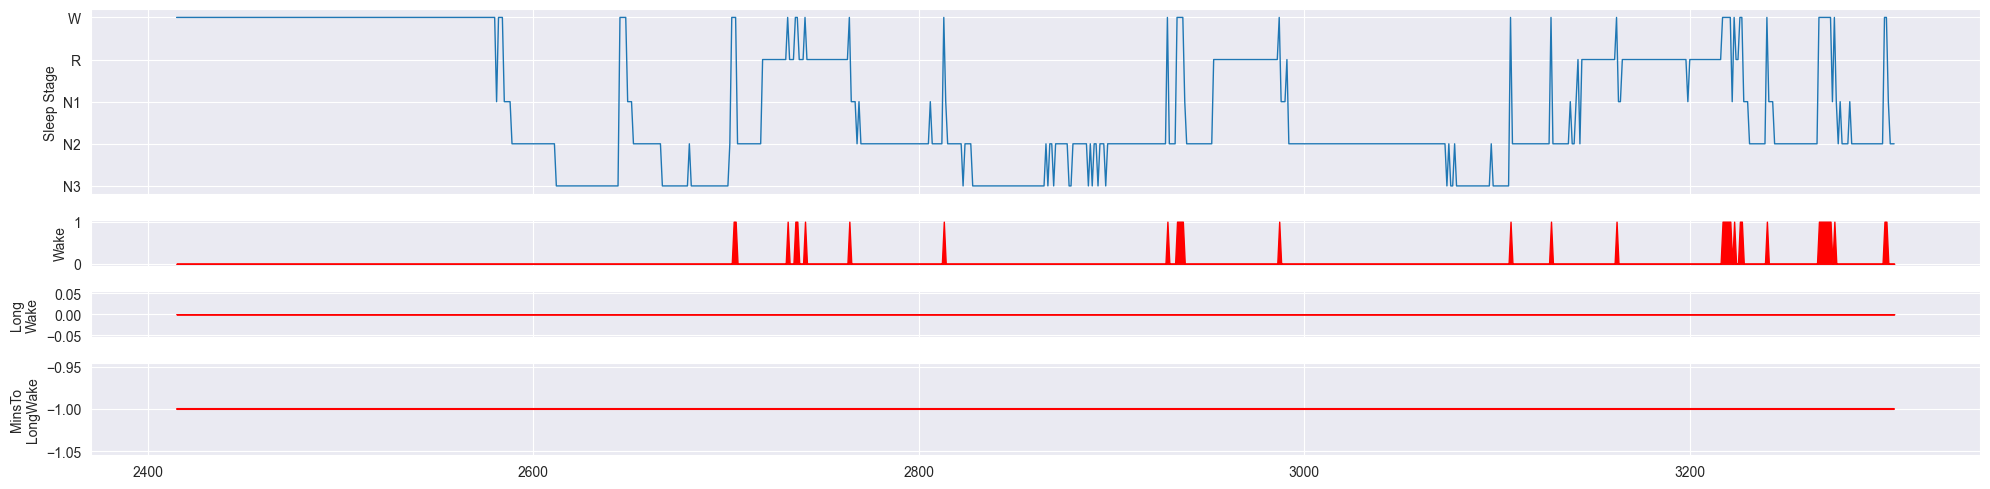

2024-07-14 00:00:00
NaT


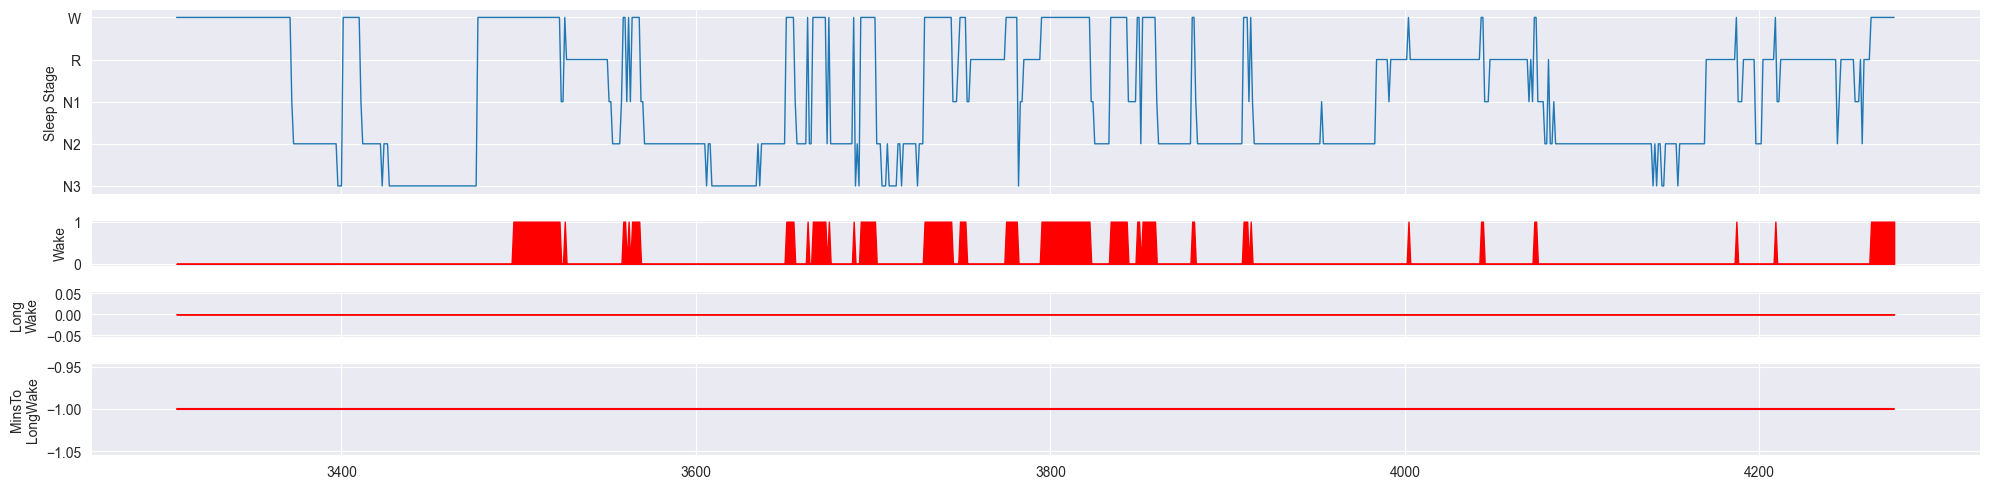

In [22]:
for index, row in not_yes_nights[['dayAndNightOf', 'YasaUsable']][:5].iterrows():
    dayAndNightOf = row['dayAndNightOf']
    YasaUsable = row['YasaUsable']
    print(dayAndNightOf)
    print(YasaUsable)
    draw_day(dayAndNightOf)
